<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/3_3_Unsupervised_Learning_in_Python_Decorrelating_Your_Data_and_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-3 Unsupervised Learning in Python - Decorrelating Your Data and Dimension Reduction

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

## Data

In [2]:
data_base_url = 'https://drive.google.com/uc?id='

### Wine

### Grain data

In [3]:
id = '1-sfcYNfZ3bC2K5AesWHcDiPiqTo1S_ie'
seeds = pd.read_csv(data_base_url + id, header=None)
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### Piedmont wine

In [4]:
id = '1mslRAnj9qdJfIqJpiVt8lSC3ygnfpzF-'
wines = pd.read_csv(data_base_url + id)
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

### Fish

In [5]:
id = '1uXnAe5FMcaRUkkiphEksjtuFqLRstfMN'
fish = pd.read_csv(data_base_url + id, header=None)
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


### Wikipedia Articles

In [6]:
id = '1VWkESs1IzFlbhOJWIODEgMC3oIqQ5W6n'
articles = pd.read_csv(data_base_url + id, index_col=0)
articles.shape

(13125, 60)

## Visualizing the PCA transformation

PCA is not a guaranteed way to improve model performance. It works best in cases of high dimensionality, correlated features, or noisy data. However, for models like decision trees, random forests, and deep learning, PCA often does not improve results and can even make performance worse.

### Dimension reduction

- Finds patterns in data and uses these patterns to re-express it in a compressed form
- More efficient storage and computation
- Reduces data to its "bare bones", discarding noisy features that cause big problems for prediction tasks, like classification, regression

### Principle Component Analysis

- PCA
- Fundamental dimension reduction technique
  1. First step: **decorrelation** (this section)
  2. Second Step: reduces dimension (covered later)

### PCA aligns data with axes

- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean 0

<img src='https://drive.google.com/uc?export=view&id=1E-0ouQxyNUGgRsbQXFmkQly8jKzF2ia0 '>

### PCA in `sklearn`

- The `fit()` method learns how to rotate and shift the samples
- The `transform()` method apples the transformation that fit learned
    - Can be applied to unseen data

In [7]:
samples = wines[['total_phenols', 'od280']]
print(samples.shape)
samples.info()

(178, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_phenols  178 non-null    float64
 1   od280          178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [8]:
samples = samples.to_numpy()

In [9]:
model = PCA()
model

PCA()

In [10]:
model.fit(samples)

PCA()

In [11]:
transformed_samples = model.transform(samples)

In [12]:
xs = samples[:, 0]
ys = samples[:, 1]
xs_t = transformed_samples[:, 0]
ys_t = transformed_samples[:, 1]

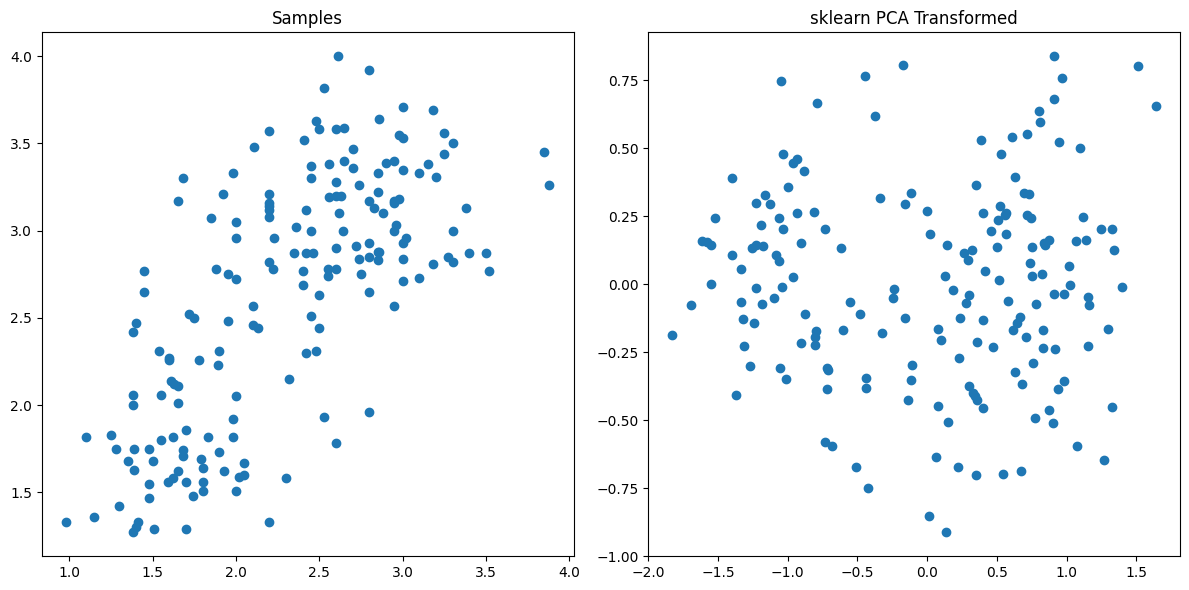

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(xs, ys)
axes[1].scatter(xs_t, ys_t)

axes[0].set_title('Samples')
axes[1].set_title('sklearn PCA Transformed')

plt.tight_layout()
plt.show()

In [14]:
pd.DataFrame(samples).corr().style.background_gradient('coolwarm',
                                                        vmin=-1,
                                                        vmax=1)

,0,1
0,1.000000,0.699949
1,0.699949,1.000000


In [15]:
# No longer correlated
pd.DataFrame(transformed_samples).corr().style.background_gradient('coolwarm',
                                                                   vmin=-1,
                                                                   vmax=1)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


### Doing it manually

Since no dimensions were removed, PCA is performing only a rotation and shift without reducing the number of features.

#### Step 1: Compute Mean Centring (Shift)

In [16]:
mean = np.mean(samples, axis=0)
mean

array([2.29511236, 2.61168539])

In [17]:
centred_samples = samples - mean

In [18]:
# it is the rotation that decorrelates, not the shifting
pd.DataFrame(samples).corr().style.background_gradient('coolwarm',
                                                        vmin=-1,
                                                        vmax=1)

,0,1
0,1.000000,0.699949
1,0.699949,1.000000


In [19]:
# it is the rotation that decorrelates, not the shifting
pd.DataFrame(centred_samples).corr().style.background_gradient('coolwarm',
                                                                vmin=-1,
                                                                vmax=1)

,0,1
0,1.000000,0.699949
1,0.699949,1.000000


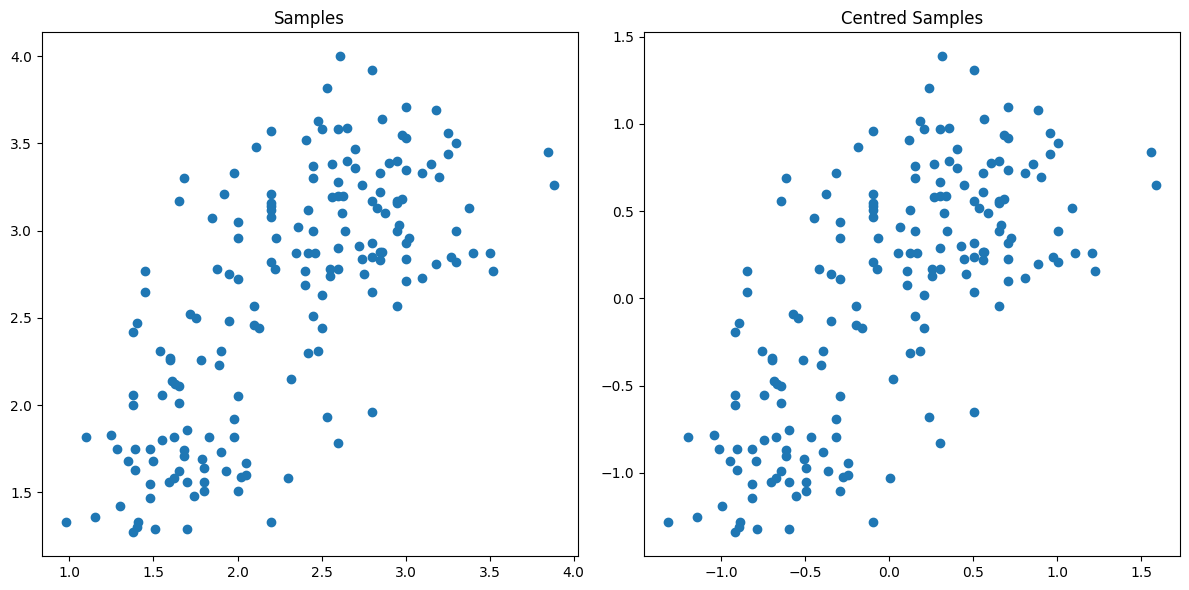

In [20]:
xs_c = centred_samples[:, 0]
ys_c = centred_samples[:, 1]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(xs, ys)
axes[1].scatter(xs_c, ys_c)

axes[0].set_title('Samples')
axes[1].set_title('Centred Samples')

plt.tight_layout()
plt.show()

#### Step 2: Compute PCA Components (Eigenvectors)

In [21]:
cov_matrix = np.cov(centred_samples.T)
cov_matrix

array([[0.39168954, 0.31102128],
       [0.31102128, 0.50408641]])

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('eigen values: ', eigenvalues)
print('eigen vectors:\n')
eigenvectors

eigen values:  [0.13183022 0.76394572]
eigen vectors:



array([[-0.76740167, -0.64116665],
       [ 0.64116665, -0.76740167]])

In [23]:
sorted_indices = np.argsort(-eigenvalues)
sorted_indices

array([1, 0])

In [24]:
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

In [25]:
manual_transformed = np.dot(centred_samples, eigenvectors)

In [26]:
xs_m = manual_transformed[:, 0]
ys_m = manual_transformed[:, 1]

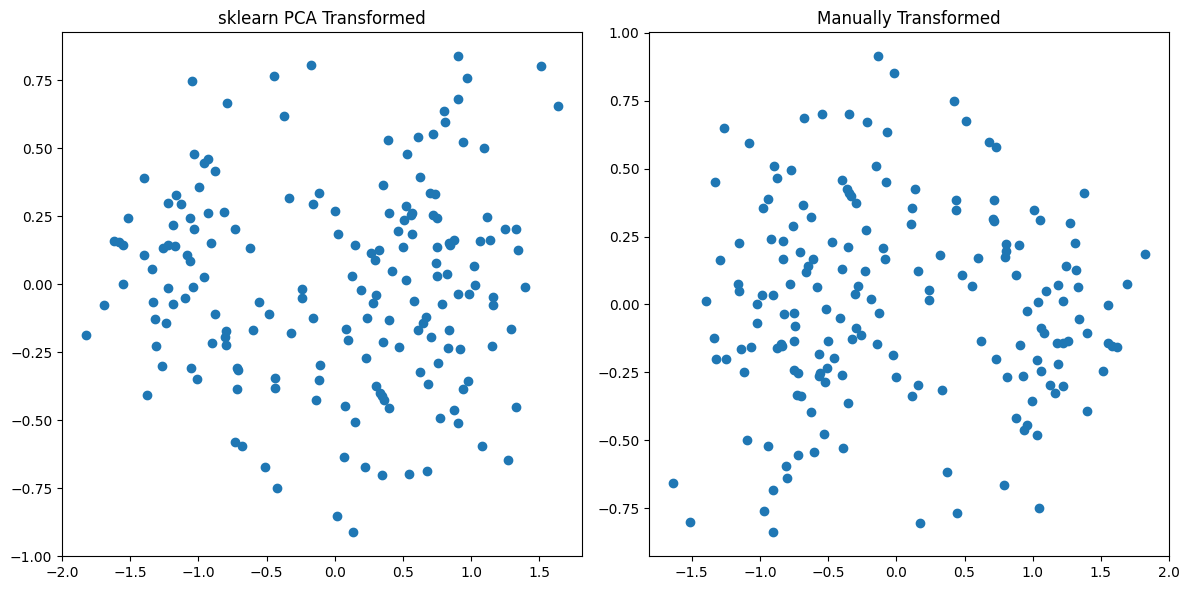

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(xs_t, ys_t)
axes[1].scatter(xs_m, ys_m)

axes[0].set_title('sklearn PCA Transformed')
axes[1].set_title('Manually Transformed')
plt.tight_layout()
plt.show()

In [28]:
# No longer correlated
pd.DataFrame(manual_transformed).corr().style.background_gradient('coolwarm',
                                                                  vmin=-1,
                                                                  vmax=1)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


####Why Might the Results Differ?

1.	Eigenvectors in PCA Can Have Flipped Signs
    - PCA eigenvectors (principal components) are unique only up to a sign flip.
	- If v is an eigenvector, then -v is also a valid eigenvector because both point in the same direction but have opposite signs.
	- `np.linalg.eig()` and Scikit-Learn’s `PCA` might choose different conventions for eigenvector orientation.
2.	Different Numerical Precision Handling
    - `np.linalg.eig()` vs. `scipy.linalg.eigh()` (which Scikit-Learn often uses internally) might produce slightly different numerical results.

In [29]:
model.components_

array([[ 0.64116665,  0.76740167],
       [ 0.76740167, -0.64116665]])

In [30]:
eigenvectors

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

### PCA features are not correlated

- Features of a dataset are often correlated
- PCA aligns data with axes
- Resulting PCA features are not linearly correlated - **decorrelation**

In [31]:
pd.DataFrame(samples).corr().style.background_gradient(cmap='coolwarm',
                                                       vmin=-1,
                                                       vmax=1)

,0,1
0,1.000000,0.699949
1,0.699949,1.000000


In [32]:
pearsonr(samples[:, 0], samples[:, 1])

PearsonRResult(statistic=0.6999493647911863, pvalue=1.5939800322022413e-27)

In [33]:
pd.DataFrame(transformed_samples).corr().style.background_gradient(cmap='coolwarm',
                                                                   vmin=-1,
                                                                   vmax=1)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


In [34]:
pearsonr(transformed_samples[:, 0], transformed_samples[:, 1])

PearsonRResult(statistic=7.253746214797019e-15, pvalue=0.9999999999999238)

In [35]:
pd.DataFrame(manual_transformed).corr().style.background_gradient(cmap='coolwarm',
                                                                 vmin=-1,
                                                                 vmax=1)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


### Principle Components

- The **prinicipal components** are the directions in which the samples vary the most (red arrows below)
- PCA aligns the principal components with the coordinate axes
- After the model has been fit, thse components are available as the `model.components_` attribute

<img src='https://drive.google.com/uc?export=view&id=1YopNCJ_XTgtTGmkavq3eISWcH0BLnpbD'/>

### Correlated data in nature

In [36]:
grains = seeds[[4, 3]]
grains.columns = ['width', 'height']
grains

,width,height
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658
...,...,...
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175


In [37]:
grains = grains.to_numpy()

In [38]:
width = grains[:, 0]
length = grains[:, 1]

In [39]:
correlation, pvalue = pearsonr(width, length)
correlation

0.8604149377143469

### Decorrelating the grain measurements with PCA

In [40]:
model = PCA()
pca_features = model.fit_transform(grains)

xs_pca = pca_features[:, 0]
ys_pca = pca_features[:, 1]

In [41]:
# manually

grains_mean = np.mean(grains, axis=0)
centered_grains = grains - grains_mean

cov_matrix = np.cov(centered_grains.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(-eigenvalues)
eigenvectors = eigenvectors[:, sorted_indices]

grains_manual = np.dot(centered_grains, eigenvectors)
xs_manual = grains_manual[:, 0]
ys_manual = grains_manual[:, 1]

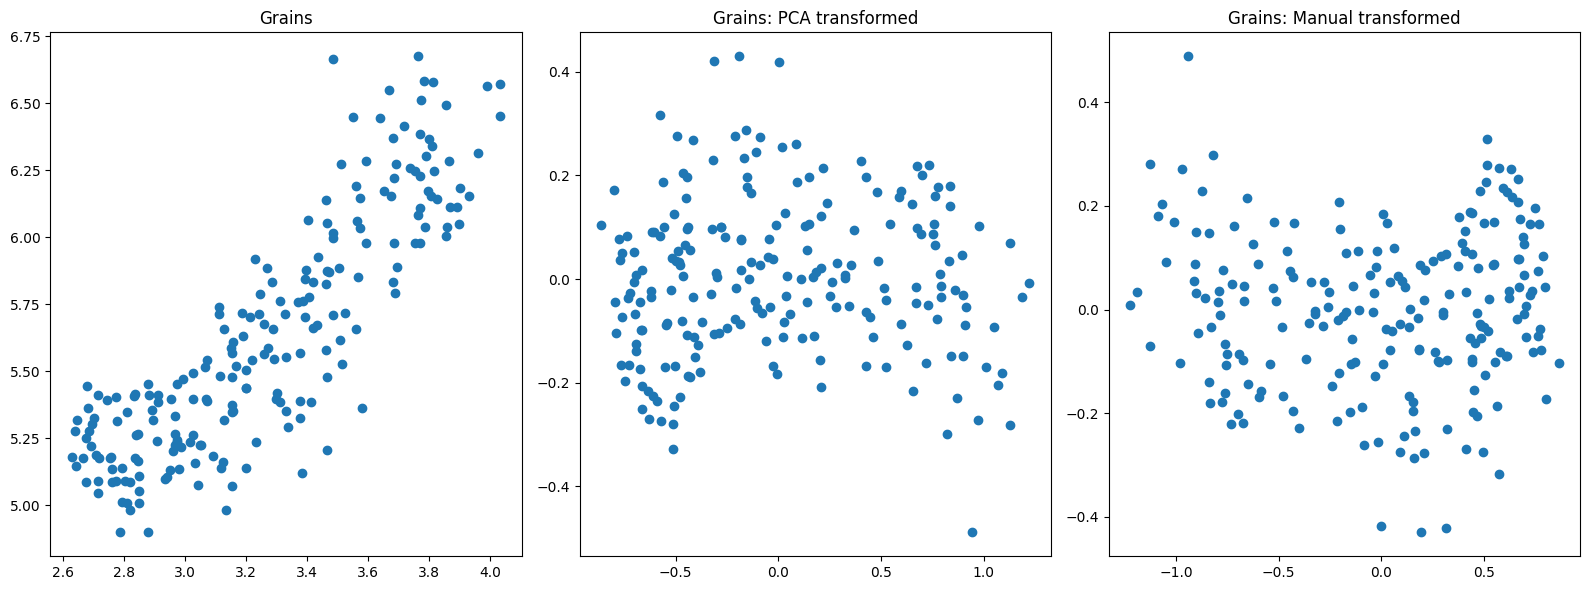

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].scatter(width, length)
axes[1].scatter(xs_pca, ys_pca)
axes[2].scatter(xs_manual, ys_manual)


axes[0].set_title('Grains')
axes[1].set_title('Grains: PCA transformed')
axes[2].set_title('Grains: Manual transformed')

plt.tight_layout()
plt.show()

In [43]:
# explains the difference between
#. the PCA and manual plots
eigenvectors, model.components_

(array([[-0.63910027, -0.76912343],
        [-0.76912343,  0.63910027]]),
 array([[ 0.63910027,  0.76912343],
        [ 0.76912343, -0.63910027]]))

## Intrinsic Dimension

<img src='https://drive.google.com/uc?export=view&id=1iI3w6eqbpKBD7ZV8_ncDOeQFH8si1_ST'/>

- 2 features: longitude and latitude along a flight path
- Dataset *appears* to be 2-dimensional
    - But it can be approximated by using one feature: **displacement along flight path**
    - Intrinsically 1-dimensional dataset

<img src='https://drive.google.com/uc?export=view&id=1OkcBBvRFAgFS8XMmudyaA9l6rPoTS0GQ'/>

### Definition

- The **intrinsic dimension** of a dataset is the number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
    - Can be detected with PCA

### Versicolor dataset

- Samples are points in 3-space
- Samples like close to a flat 3-dimensional sheet
- Which means the data can be approximated by using only 2 features, without losing much information
- PCA identifies intrinsic dimension when samples have any number of features
- Instrinsic dimension is the number of PCA features with significant variance

In [44]:
id = '1Rqb4thhyLP1OZVvMamDdJ0EI1UQgIR44'
iris = pd.read_csv(data_base_url + id)

versicolor = iris[iris['variety'] == 'Versicolor']
versicolor = versicolor[['sepal.length', 'sepal.width', 'petal.width']]
versicolor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 50 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  50 non-null     float64
 1   sepal.width   50 non-null     float64
 2   petal.width   50 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


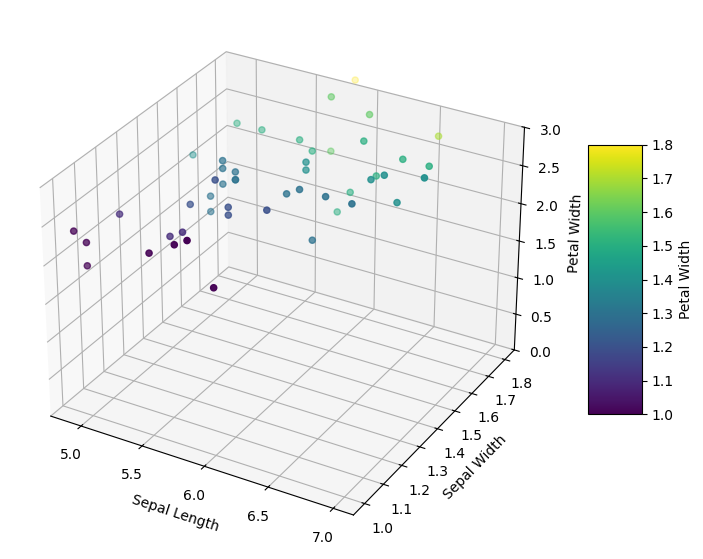

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(versicolor['sepal.length'],
                     versicolor['petal.width'],
                     versicolor['sepal.width'],
                     c=versicolor['petal.width'],
                     cmap='viridis')

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Width")
ax.set_zlim([0, 3])


cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Petal Width')

plt.show()

In [46]:
model = PCA()
vers_transformed = model.fit_transform(versicolor)

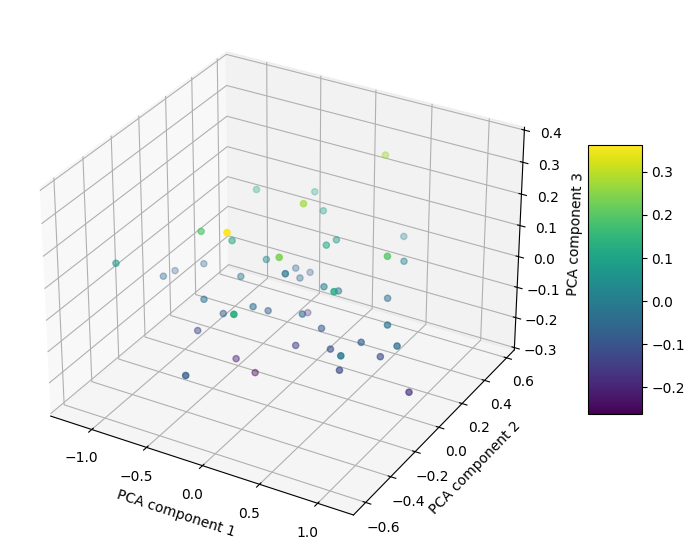

In [47]:
xs = vers_transformed[:, 0]
ys = vers_transformed[:, 1]
zs = vers_transformed[:, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xs,
                     ys,
                     zs,
                     c=zs,
                     cmap='viridis')

ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
ax.set_zlabel("PCA component 3")

cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

plt.show()

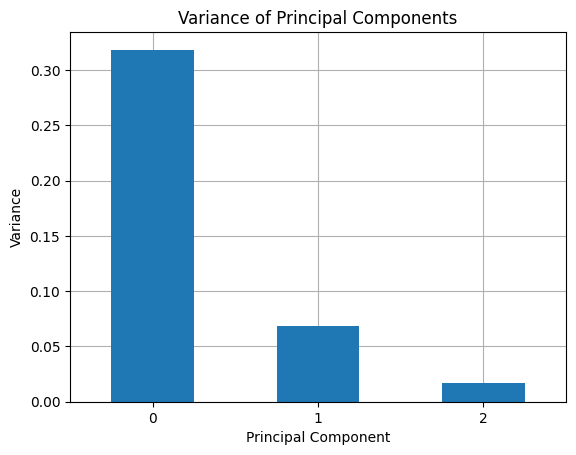

In [48]:
fig, ax = plt.subplots()
pd.DataFrame(vers_transformed).var().plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance')

plt.grid()
ax.set_axisbelow(True)

plt.show()

### Variance and instrinsic dimension

- Intrinsic dimension is the number of PCA features with signficant variance
- In our example, only the first two PCA features have significant variance

$\therefore$ The versicolor dataset has an intrinsic dimension of $2$.

In [49]:
# alternately
model.n_components_, model.explained_variance_

(3, array([0.31838135, 0.06840638, 0.01722043]))

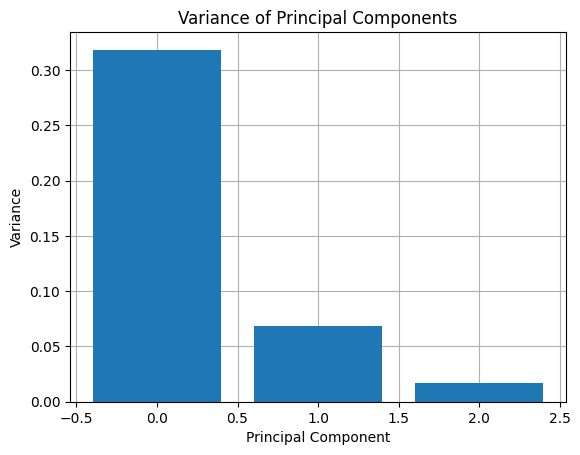

In [50]:
fig, ax = plt.subplots()

plt.bar(range(model.n_components_), model.explained_variance_)

plt.xticks(rotation=0)
plt.title('Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance')

plt.grid()
ax.set_axisbelow(True)

plt.show()

### Intrinsic dimension can be ambiguous

- Intrinsice dimension is an idealization
- ***There is not always one answer***
- Piedemont wines: could argue for 2, 3 or more

<img src='https://drive.google.com/uc?export=view&id=1v9gc2IsqTjwlUC9HJwHEOB7y7gojs9yo'/>

### The first principal component

- The first principal component is the data in the direction in which the data varies the most

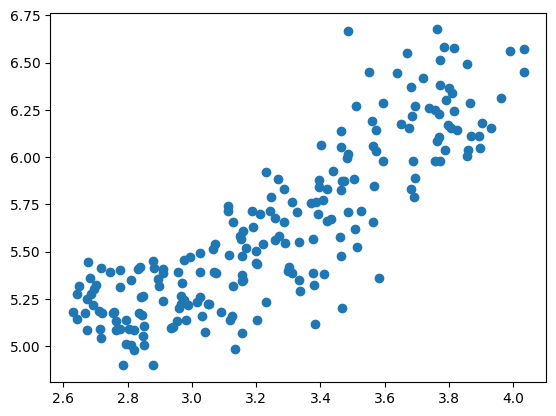

In [51]:
plt.scatter(grains[:, 0], grains[:, 1]);

In [52]:
model = PCA()
model.fit(grains)

PCA()

In [53]:
grains_transformed = model.transform(grains)

In [54]:
model.mean_, grains.mean(axis=0)

(array([3.25860476, 5.62853333]), array([3.25860476, 5.62853333]))

In [55]:
model.components_

array([[ 0.63910027,  0.76912343],
       [ 0.76912343, -0.63910027]])

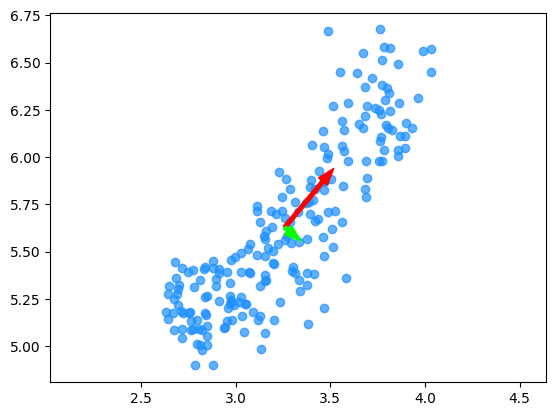

In [56]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1], color='dodgerblue', alpha=0.7)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]
second_pc = model.components_[1, :]

# explained varianced
first_eigenvalue = model.explained_variance_[0]
second_eigenvalue = model.explained_variance_[1]

first_pc = first_pc * first_eigenvalue
second_pc = second_pc  * second_eigenvalue

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.02)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='lime', width=0.02)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Variance of the PCA features

In [57]:
samples = fish.iloc[:, 1:].to_numpy()
samples.shape

(85, 6)

In [58]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [59]:
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

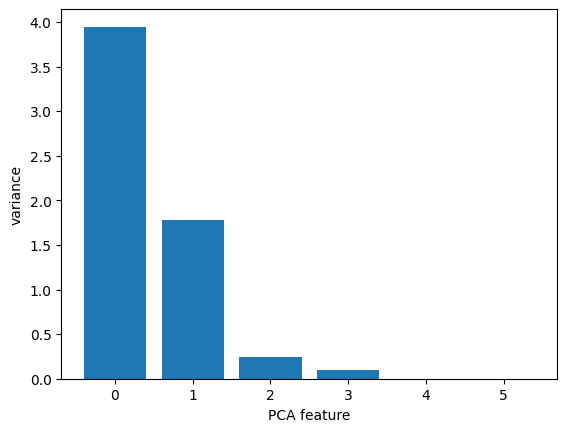

In [60]:
features =range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

- The fish data has 2 instrinsic dimensions

## Dimension reduction with PCA

### Dimension reduction

- Represents same data, using less features
- Important part of machine learning pipelines
- Can be performed using PCA

### Using PCA for dimension reduction

- PCA features are in decreasing order of variance
- Assumes the low variance features are noise
- Assumes the high variance features are informative
- Need to specify how many features to keep

```python
# keep only the first two PCA features
PCA(n_components=2)
```

- Intrinsic dimension of the data set is a good choice

## Dimension reduction of the iris dataset

- `samples` is an array of iris measurements (4 features)
- `species` is a list of iris species numbers

In [61]:
samples = iris.drop('variety', axis=1).to_numpy()

encoder = LabelEncoder()
species = encoder.fit_transform(iris['variety'])
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
samples[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
pca = PCA(n_components=2)
pca.fit(samples)

PCA(n_components=2)

In [64]:
iris_transformed = pca.transform(samples)
iris_transformed.shape

(150, 2)

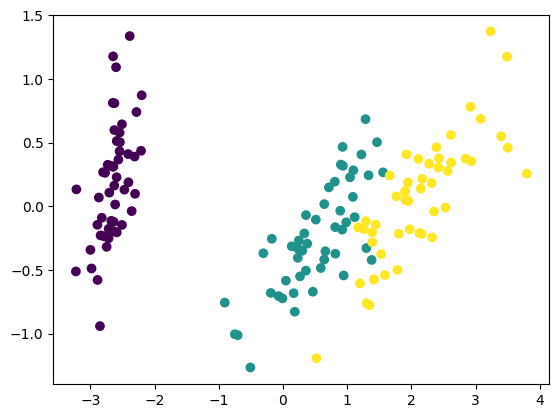

In [65]:
xs = iris_transformed[:, 0]
ys = iris_transformed[:, 1]

plt.scatter(xs, ys, c=species)
plt.show()

- PCA has reduced the dimension to 2
- Retained the 2 PCA features with the highest variance
- Important information preserved: species remain distinct

### Assumptions

- Assumes the low variance features are noise
- Assumes the high variance features are informative
- This assumption typically holds in practice like it did with the Iris dataset, but it **does not always hold**

### Word frequency arrays

- Rows represent documents
- Columns represent words
- Entries measure presence of each word in each document
- Measure using **tf-idf**
- Most entries in such an array are 0
    - **sparse** array
    - instead of `np.array` use `scipy.sparse.csr_matrix`
    - `csr_matrix` remembers only the non-zero entries (saves space)

<img src='https://drive.google.com/uc?export=view&id=1KOhEL7qtk0Fx2TVGkCcxjrXhjnV2r6kH'/>

### `TruncatedSVD` and `csr_matrix`

- sklearn `PCA` doesn't support `csr_matrix`
- Use `TruncatedSVD` instead
- Performs same transformation

```python
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=3)
model.fit(documents) # documents is a csr_matrix
transformed = model.transform(documents)
```


### Dimension reduction of the fish measurements

In [66]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [67]:
samples = fish.drop(0, axis=1)
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       85 non-null     float64
 1   2       85 non-null     float64
 2   3       85 non-null     float64
 3   4       85 non-null     float64
 4   5       85 non-null     float64
 5   6       85 non-null     float64
dtypes: float64(6)
memory usage: 4.1 KB


In [68]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(fish[0])
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)
scaled_samples[0]

array([-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
        0.25373964])

In [70]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [71]:
pca.fit(scaled_samples)

PCA(n_components=2)

In [72]:
pca_features = pca.transform(scaled_samples)
pca_features[0:4]

array([[-0.57640502,  0.94649159],
       [-0.36852393,  1.17103598],
       [-0.28028168,  1.59709224],
       [-0.00955427,  0.81967711]])

In [73]:
pca_features[:, 0]

array([-0.57640502, -0.36852393, -0.28028168, -0.00955427,  0.1238945 ,
        0.23193213,  0.33446854,  0.16081896,  0.29541529,  0.46043999,
        0.44608943,  0.47829437,  0.4735883 ,  0.73492898,  0.7739823 ,
        0.97048843,  0.97191941,  0.92078931,  0.97269014,  0.93832898,
        1.09413347,  1.02607199,  1.19594301,  1.21981843,  1.28215964,
        1.28102008,  1.35512796,  1.56324473,  1.92584477,  1.93991544,
        1.98315357,  2.10532253,  2.2928189 ,  2.25616715, -2.43111613,
       -1.90454031, -1.79125251, -1.66919652, -1.53019235, -1.64591521,
       -1.49861879, -1.46918052, -1.30868872, -1.2912297 , -1.19653317,
       -1.26874943, -1.20676216, -1.00605794, -1.09293025, -0.97227047,
       -0.87563108, -0.54366744, -0.45311316,  0.24132972, -3.2247437 ,
       -3.11578856, -3.13606884, -3.01196518, -3.01859702, -3.01953587,
       -2.94938148, -2.9682391 , -2.95851531, -2.91341611, -2.88193847,
       -2.85443347, -2.56545202, -2.52301149, -0.21609392,  0.18

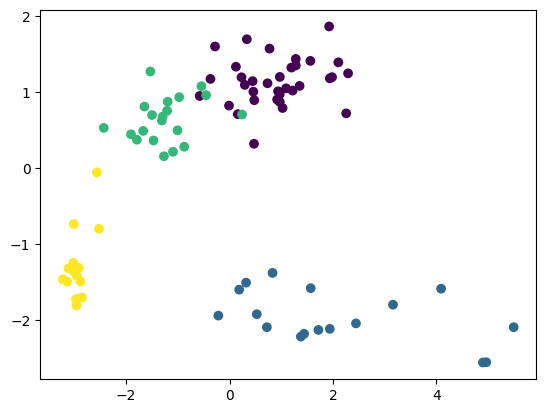

In [74]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=encoded_labels)
plt.show()

### What was the instrinsic dimension?

In [75]:
pca = PCA()
test_instrinsic = pca.fit_transform(scaled_samples)
scaled_samples.shape, test_instrinsic.shape

((85, 6), (85, 6))

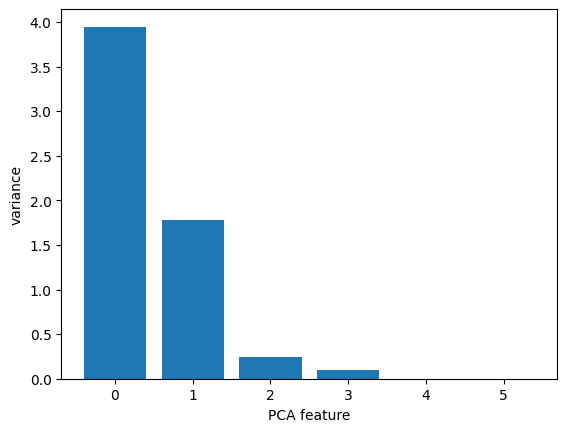

In [76]:
# It is not surprising that the intrinsic dimensionm is 2
#. since when we used n_componenets=2 it worked so well
features =range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### A tf-idf word-frequency array

In [77]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
documents

['cats say meow', 'dogs say woof', 'dogs chase cats']

In [78]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents)
csr_mat

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [79]:
csr_mat.toarray()

array([[0.51785612, 0.        , 0.        , 0.68091856, 0.51785612,
        0.        ],
       [0.        , 0.        , 0.51785612, 0.        , 0.51785612,
        0.68091856],
       [0.51785612, 0.68091856, 0.51785612, 0.        , 0.        ,
        0.        ]])

In [80]:
csr_mat

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [81]:
tfidf.get_feature_names_out()

array(['cats', 'chase', 'dogs', 'meow', 'say', 'woof'], dtype=object)

In [82]:
pd.DataFrame(csr_mat.toarray(), columns=tfidf.get_feature_names_out())

,cats,chase,dogs,meow,say,woof
0,0.517856,0.000000,0.000000,0.680919,0.517856,0.000000
1,0.000000,0.000000,0.517856,0.000000,0.517856,0.680919
2,0.517856,0.680919,0.517856,0.000000,0.000000,0.000000


In [83]:
documents

['cats say meow', 'dogs say woof', 'dogs chase cats']

### Clustering Wikipedia

In [84]:
titles = articles.columns
titles

Index(['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie',
       'Google Search', 'Tumblr', 'Hypertext Transfer Protocol',
       'Social search', 'Firefox', 'LinkedIn', 'Global warming',
       'Nationally Appropriate Mitigation Action', 'Nigel Lawson',
       'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org',
       'Greenhouse gas emissions by the United States',
       '2010 United Nations Climate Change Conference',
       '2007 United Nations Climate Change Conference', 'Angelina Jolie',
       'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones',
       'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning',
       'Anne Hathaway', 'Jennifer Aniston', 'France national football team',
       'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao',
       'Zlatan Ibrahimović', 'Colombia national football team',
       '2014 FIFA World Cup qualification', 'Football', 'Neymar',
       'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', '

In [85]:
from scipy.sparse import csr_matrix
articles = articles.to_numpy()
articles.shape

(13125, 60)

In [86]:
# I don't know why I had to use .T
#. but `articles` new matches the data used in the tutorial
articles = csr_matrix(articles.T)

In [87]:
articles.toarray().shape

(60, 13125)

In [88]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans
# from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)

pipeline = make_pipeline(svd, kmeans)

In [89]:
pipeline.fit(articles)

Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])

In [90]:
labels = pipeline.predict(articles)
labels

array([5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 3, 3, 5, 5,
       5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [91]:
df = pd.DataFrame({'label': labels, 'article': titles})
df.sort_values(by='label')

,label,article
30,0,France national football team
39,0,Franck Ribéry
38,0,Neymar
36,0,2014 FIFA World Cup qualification
35,0,Colombia national football team
34,0,Zlatan Ibrahimović
33,0,Radamel Falcao
31,0,Cristiano Ronaldo
23,1,Catherine Zeta-Jones
24,1,Jessica Biel
